# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>
<br>
Natalia Lach
<br>
### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
#!python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [ ]:
# ===== Twoja implementacja tutaj =====
#funkcje zaimplementowane w main :)

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


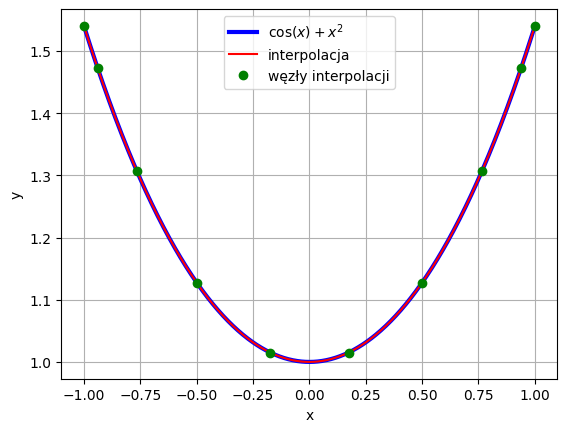

In [3]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

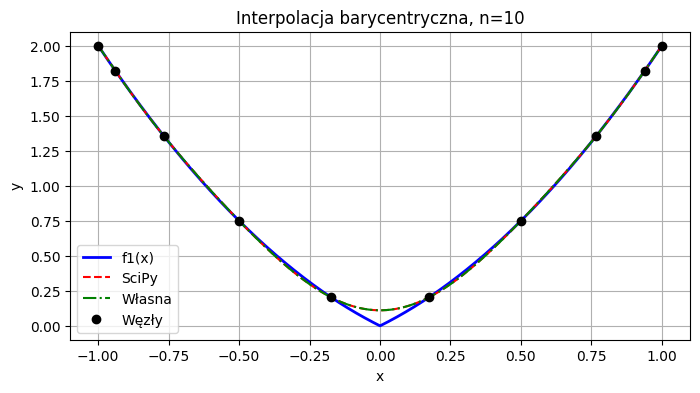

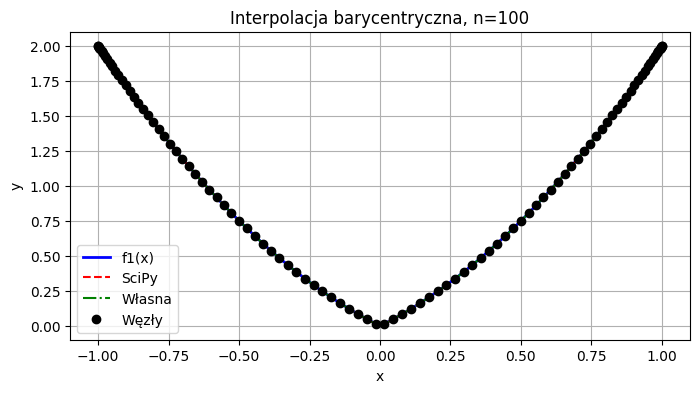

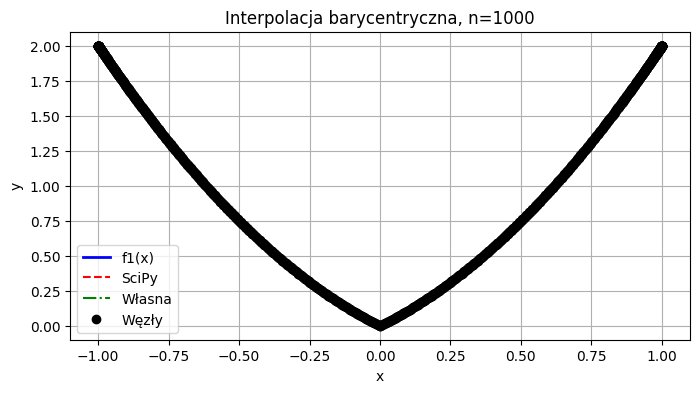

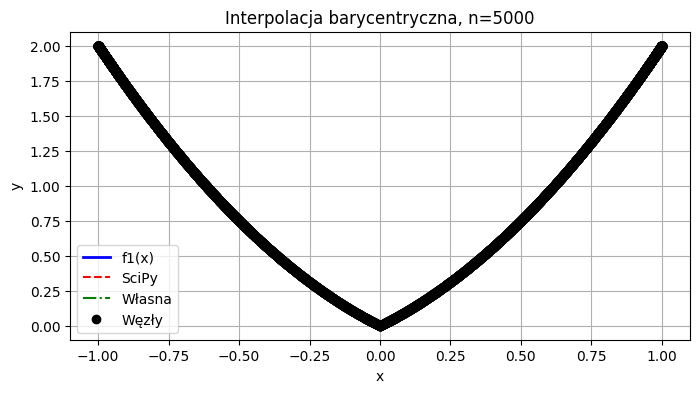

         n    err_scipy      err_own   time_scipy[s]     time_own[s]
        10    1.101e-01    1.101e-01          0.0000          0.1179
       100    9.124e-03    9.124e-03          0.0165          0.0695
      1000    2.381e-04    2.381e-04          0.0726          0.0949
      5000    4.164e-06    4.164e-06          0.3701          0.1205


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time
from scipy.interpolate import barycentric_interpolate
from main import chebyshev_nodes, bar_cheb_weights, f1, barycentric_inte, L_inf

x_plot = np.linspace(-1, 1, 1000)  
orders = [10, 100, 1000, 5000]     

results = []



for n in orders:
    xi = chebyshev_nodes(n)
    yi = f1(xi)
    wi = bar_cheb_weights(n)
    
  
    start = time.time()
    y_scipy = barycentric_interpolate(xi, yi, x_plot)
    t_scipy = time.time() - start
    
    start = time.time()
    y_own = barycentric_inte(xi, yi, wi, x_plot)
    t_own = time.time() - start
   
    err_scipy = L_inf(f1(x_plot), y_scipy)
    err_own = L_inf(f1(x_plot), y_own)
    
    results.append((n, err_scipy, err_own, t_scipy, t_own))
    
    plt.figure(figsize=(8,4))
    plt.plot(x_plot, f1(x_plot), 'b', linewidth=2, label='f1(x)')
    plt.plot(x_plot, y_scipy, 'r--', label='SciPy')
    plt.plot(x_plot, y_own, 'g-.', label='Własna')
    plt.plot(xi, yi, 'ko', label='Węzły')
    plt.title(f"Interpolacja barycentryczna, n={n}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


print(f"{'n':>10} {'err_scipy':>12} {'err_own':>12} {'time_scipy[s]':>15} {'time_own[s]':>15}")
for row in results:
    print(f"{row[0]:>10} {row[1]:>12.3e} {row[2]:>12.3e} {row[3]:>15.4f} {row[4]:>15.4f}")

Dla małych rzędu interpolacji (np. n=10) błąd jest relatywnie duży, bo liczba węzłów jest niewystarczająca do dokładnego odwzorowania funkcji. W miarę zwiększania liczby węzłów (n=100, 1000) błąd zmniejsza się znacząco.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

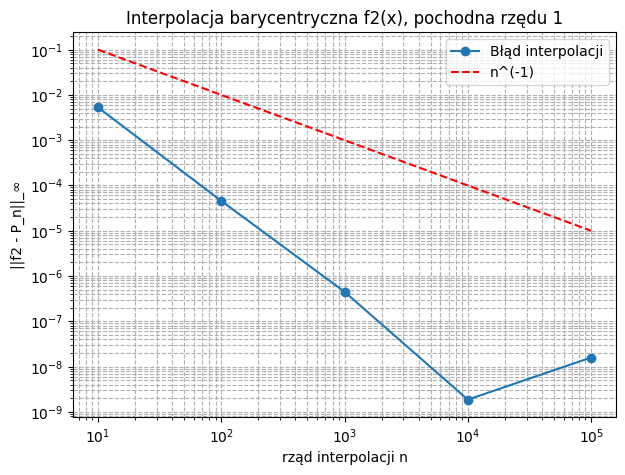

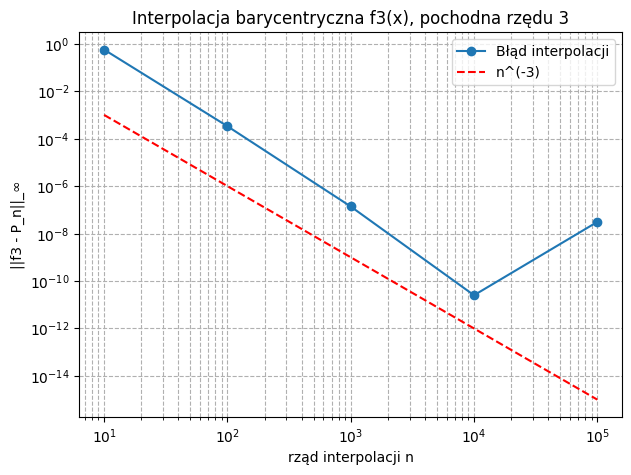

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from main import chebyshev_nodes, bar_cheb_weights, barycentric_inte, L_inf, f2, f3


x_eval = np.linspace(-1, 1, 1000)
orders = [10, 100, 1000, 10000, 100000]  

errors_f2 = []

for n in orders:
    xi = chebyshev_nodes(n)
    yi = f2(xi)
    wi = bar_cheb_weights(n)
    
    y_interp = barycentric_inte(xi, yi, wi, x_eval)
    if y_interp is None:
        break
    
    err = L_inf(f2(x_eval), y_interp)
    errors_f2.append(err)
    

    if err < 1e-14:
        break


n_vals = np.array(orders[:len(errors_f2)])
plt.figure(figsize=(7,5))
plt.loglog(n_vals, errors_f2, 'o-', label='Błąd interpolacji')
plt.loglog(n_vals, 1 / n_vals, 'r--', label='n^(-1)')
plt.xlabel('rząd interpolacji n')
plt.ylabel('||f2 - P_n||_∞')
plt.title('Interpolacja barycentryczna f2(x), pochodna rzędu 1')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()


#f3
errors_f3 = []

for n in orders:
    xi = chebyshev_nodes(n)
    yi = f3(xi)
    wi = bar_cheb_weights(n)
    
    y_interp = barycentric_inte(xi, yi, wi, x_eval)
    if y_interp is None:
        break
    
    err = L_inf(f3(x_eval), y_interp)
    errors_f3.append(err)
    
    if err < 1e-14:
        break


n_vals = np.array(orders[:len(errors_f3)])
plt.figure(figsize=(7,5))
plt.loglog(n_vals, errors_f3, 'o-', label='Błąd interpolacji')
plt.loglog(n_vals, 1 / n_vals**3, 'r--', label='n^(-3)')
plt.xlabel('rząd interpolacji n')
plt.ylabel('||f3 - P_n||_∞')
plt.title('Interpolacja barycentryczna f3(x), pochodna rzędu 3')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()


---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

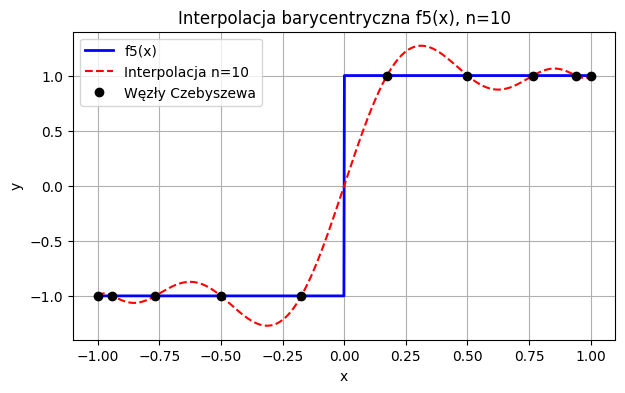

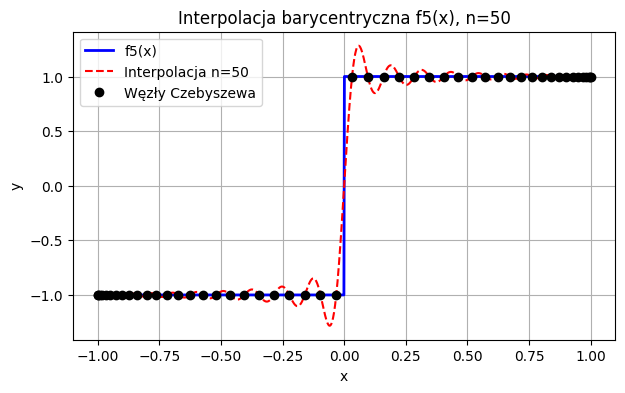

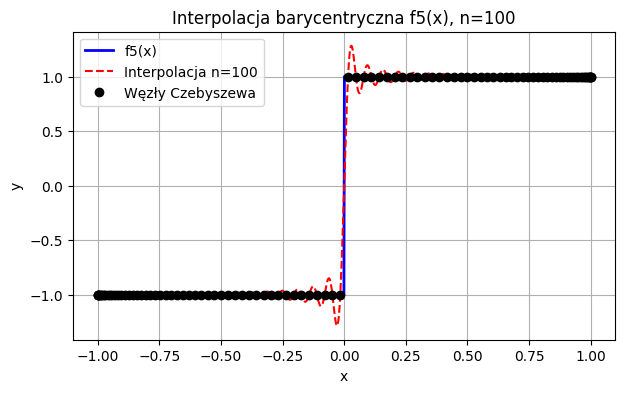

Minimalny błąd L_inf dla n parzystych: 9.265e-01
Minimalny błąd L_inf dla n nieparzystych: inf


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from main import chebyshev_nodes, bar_cheb_weights, barycentric_inte, L_inf, f5

x_eval = np.linspace(-1, 1, 1000)

orders = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

min_error_even = float('inf')
min_error_odd = float('inf')

for n in orders:
    xi = chebyshev_nodes(n)
    yi = f5(xi)
    wi = bar_cheb_weights(n)
    
    
    y_interp = barycentric_inte(xi, yi, wi, x_eval)
    
    
    err = L_inf(f5(x_eval), y_interp)
    
    if n % 2 == 0:  
        if err < min_error_even:
            min_error_even = err
    else:        
        if err < min_error_odd:
            min_error_odd = err

  
    if n in [10, 25, 50, 75, 100]:
        plt.figure(figsize=(7,4))
        plt.plot(x_eval, f5(x_eval), 'b', linewidth=2, label='f5(x)')
        plt.plot(x_eval, y_interp, 'r--', label=f'Interpolacja n={n}')
        plt.plot(xi, yi, 'ko', label='Węzły Czebyszewa')
        plt.title(f'Interpolacja barycentryczna f5(x), n={n}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.legend()
        plt.show()

print(f"Minimalny błąd L_inf dla n parzystych: {min_error_even:.3e}")
print(f"Minimalny błąd L_inf dla n nieparzystych: {min_error_odd:.3e}")


Różnica między wynikami dla parzystych i nieparzystych wynika z położenia węzłów Czebyszewa względem skoku funkcji.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)